In [97]:
#LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import HTML

In [98]:
#CSV FILES

education=pd.read_csv('education.csv')
income=pd.read_csv('income.csv')
poverty=pd.read_csv('poverty.csv')
race=pd.read_csv('share_race_by_city.csv')
police_killing_test=pd.read_csv('police_killings_test.csv')
police_killing_train=pd.read_csv('police_killings_train.csv')
police_killing_train

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,2256,Jeremy Lopez-Robledo,24/01/17,shot,knife,29.0,M,H,Las Cruces,NM,True,attack,Foot,True
2024,2257,Jonathan David Sper,24/01/17,shot,unarmed,30.0,M,W,Algoma Township,MI,True,attack,Not fleeing,False
2025,2258,Jose Efrain Rodriguez,24/01/17,shot and Tasered,gun,18.0,M,H,Lancaster City,PA,False,attack,Not fleeing,False
2026,2259,Ramon Milanez,24/01/17,shot,gun,32.0,M,H,Kuna,ID,False,attack,Car,False


In [99]:
#MERGING DATA
merged_data=pd.merge(education,income, on =['Geographic Area','City'])
merged_data=pd.merge(merged_data,poverty, on =['Geographic Area','City'])
race=race.rename(columns={'Geographic area':'Geographic Area'})
merged_data=pd.merge(merged_data,race, on =['Geographic Area','City'])
#display(HTML(merged_data.to_html()))
merged_data

,Geographic Area,City,percent_completed_hs,Median Income,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,21.2,11207,78.8,67.2,30.2,0,0,1.6
1,AL,Abbeville city,69.1,25615,29.1,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,78.9,42575,25.5,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,81.4,37083,30.7,99.1,0.1,0,0.1,0.4
4,AL,Akron town,68.6,21667,42,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...,...,...,...
29110,WY,Woods Landing-Jelm CDP,100,NaN,18.6,95.9,0,0,2.1,0
29111,WY,Worland city,85.6,41523,15.3,89.9,0.3,1.3,0.6,16.6
29112,WY,Wright town,89.2,77114,5.9,94.5,0.1,1.4,0.2,6.2
29113,WY,Yoder town,79.4,37500,5.4,97.4,0,0,0,4


Which state has the most fatal police shootings? Which city is the most dangerous?

CA    424
TX    225
FL    154
AZ    118
OH     79
OK     78
CO     74
GA     70
NC     69
MO     64
Name: state, dtype: int64

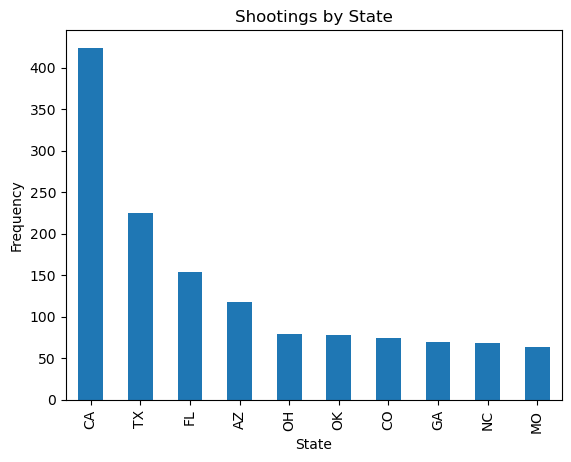

In [107]:
frames = [police_killing_test, police_killing_train]
killings = pd.concat(frames, ignore_index=True)
state_shootings = killings["state"].value_counts()[0:10]
state_shootings.plot.bar()
plt.xlabel("State")
plt.ylabel("Frequency")
plt.title("Shootings by State")
state_shootings

Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Austin         18
Miami          18
St. Louis      15
Name: city, dtype: int64

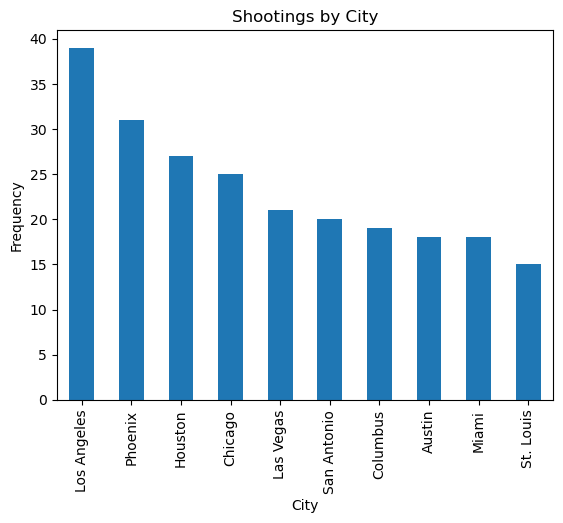

In [106]:
city_shootings = killings["city"].value_counts()[0:10]
city_shootings.plot.bar()
plt.xlabel("City")
plt.ylabel("Frequency")
plt.title("Shootings by City")
city_shootings

What is the most common way of being armed?

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
machete             18
unknown weapon      18
Taser                9
ax                   9
Name: armed, dtype: int64

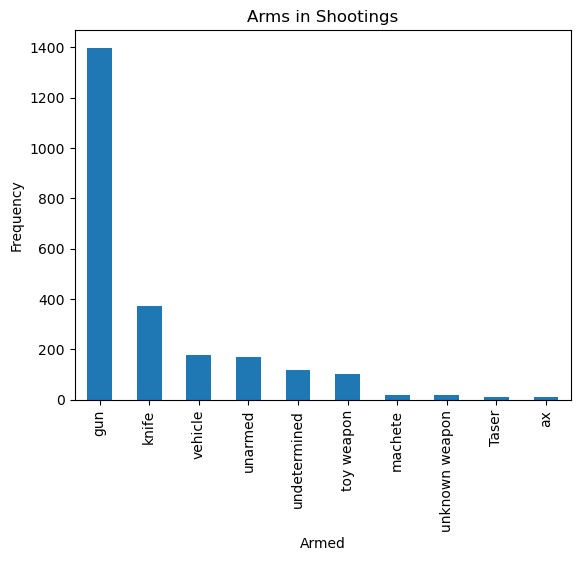

In [105]:
armed = killings["armed"].value_counts()[0:10]
armed.plot.bar()
plt.xlabel("Armed")
plt.ylabel("Frequency")
plt.title("Arms in Shootings")
armed

What is the age distribution of the victims? Compare age distribution of different races.

Text(0.5, 1.0, 'Age Distribution of Shooting Victims')

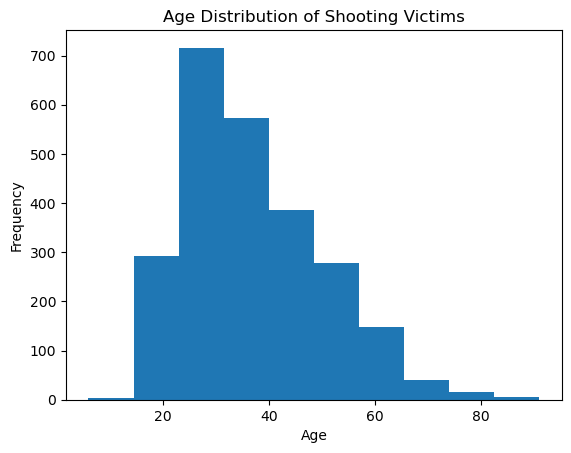

In [104]:
ages = killings["age"]
ages.plot(kind='hist')
plt.xlabel("Age")
plt.title("Age Distribution of Shooting Victims")

In [112]:
killings["race"].unique()

array(['B', 'W', 'H', nan, 'A', 'N', 'O'], dtype=object)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,2261,Kevin Darnell Washington,25/01/17,shot,gun,54.0,M,B,Southaven,MS,False,attack,Not fleeing,False
4,2267,Deaundre Phillips,26/01/17,shot,undetermined,24.0,M,B,Atlanta,GA,False,other,Car,True
10,2274,Mi'Chance Dunlap-Gittens,28/01/17,shot,gun,17.0,M,B,Des Moines,WA,False,attack,Not fleeing,False
13,2269,Marvin Washington,30/01/17,shot,gun,50.0,M,B,Kiowa,OK,False,other,Not fleeing,False
17,2278,TK TK,31/01/17,shot and Tasered,knife,NaN,M,B,Hollywood,CA,True,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,2243,Marquis Thomas,18/01/17,shot,gun,19.0,M,B,Gary,IN,False,attack,Car,False
2516,2237,Ronnie Lee Shorter,21/01/17,shot,gun,44.0,M,B,Greenville,MS,False,attack,Not fleeing,False
2519,2234,Christopher Thompkins,22/01/17,shot,gun,57.0,M,B,Pittsburgh,PA,False,attack,Not fleeing,False
2525,2253,Armond Brown,23/01/17,shot and Tasered,knife,25.0,M,B,Kenner,LA,True,other,Not fleeing,False


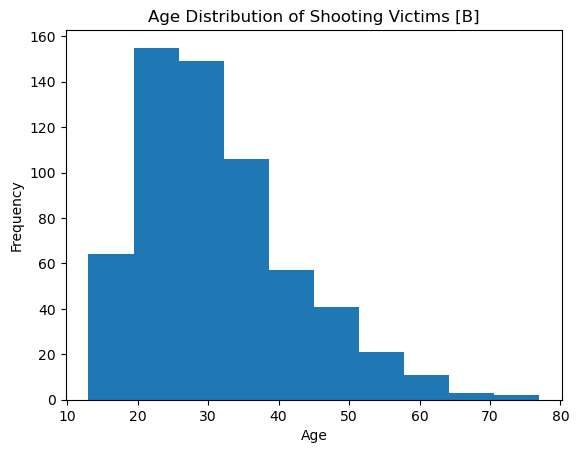

In [114]:
b_killings = killings[killings["race"] == 'B']
ages = b_killings["age"]
ages.plot(kind='hist')
plt.xlabel("Age")
plt.title("Age Distribution of Shooting Victims [B]")
b_killings

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
1,2262,Donovan Paul Scheurich,25/01/17,shot,gun,50.0,M,W,Millston,WI,True,attack,Not fleeing,True
3,2266,Kerry Lee Coomer,26/01/17,shot,gun,59.0,M,W,Overlea,MD,True,attack,Not fleeing,True
5,2268,William Brigham,26/01/17,shot,metal pipe,34.0,M,W,Madison Township,OH,False,other,Not fleeing,False
7,2706,Matthew Zank,28/01/17,shot,toy weapon,48.0,M,W,Eau Claire,WI,True,attack,Not fleeing,False
8,2707,Bradley Joseph Szacaks,28/01/17,shot,gun,45.0,M,W,Apache Junction,AZ,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,2249,Daniel D. Rogers,23/01/17,shot,unarmed,27.0,M,W,Springfield,IL,True,attack,Not fleeing,True
2524,2251,Bruce Altenburger,23/01/17,shot,gun,60.0,M,W,Wilmington,DE,True,other,Not fleeing,False
2527,2247,Dakota A. Lukecart,24/01/17,shot,unarmed,22.0,M,W,Sugar Creek,MO,False,other,Car,False
2531,2257,Jonathan David Sper,24/01/17,shot,unarmed,30.0,M,W,Algoma Township,MI,True,attack,Not fleeing,False


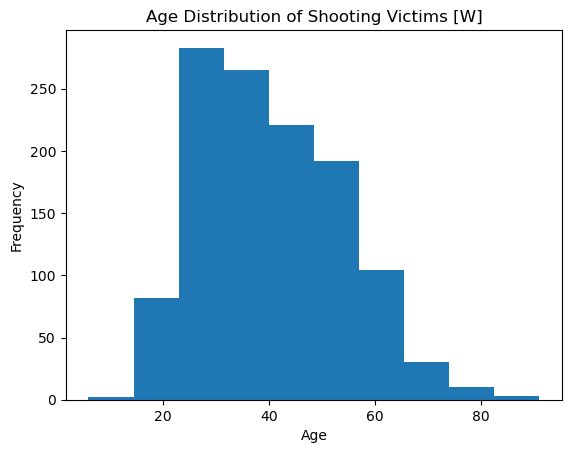

In [115]:
w_killings = killings[killings["race"] == 'W']
ages = w_killings["age"]
ages.plot(kind='hist')
plt.xlabel("Age")
plt.title("Age Distribution of Shooting Victims [W]")
w_killings

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2,2265,Josue Javier Diaz,26/01/17,shot,gun,28.0,M,H,Charlotte,NC,False,other,Car,False
6,2272,Eduardo Hernandez,27/01/17,shot,gun,25.0,M,H,Alhambra,CA,True,attack,Not fleeing,True
9,2273,Gerardo Coronado,28/01/17,shot,gun,25.0,M,H,Fort Stockton,TX,False,attack,Car,False
12,2275,Steve Salgado,29/01/17,shot,unarmed,18.0,M,H,Santa Ana,CA,False,undetermined,Foot,False
15,2276,Refugio Alvarez,30/01/17,shot and Tasered,gun and knife,45.0,M,H,Fresno,CA,True,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2526,2246,Josue Gallardo,24/01/17,shot,gun,34.0,M,H,Atascadero,CA,False,other,Not fleeing,False
2529,2255,Antonio Arturo Perez Garcia,24/01/17,shot,gun,27.0,M,H,Bakersfield,CA,False,attack,Other,False
2530,2256,Jeremy Lopez-Robledo,24/01/17,shot,knife,29.0,M,H,Las Cruces,NM,True,attack,Foot,True
2532,2258,Jose Efrain Rodriguez,24/01/17,shot and Tasered,gun,18.0,M,H,Lancaster City,PA,False,attack,Not fleeing,False


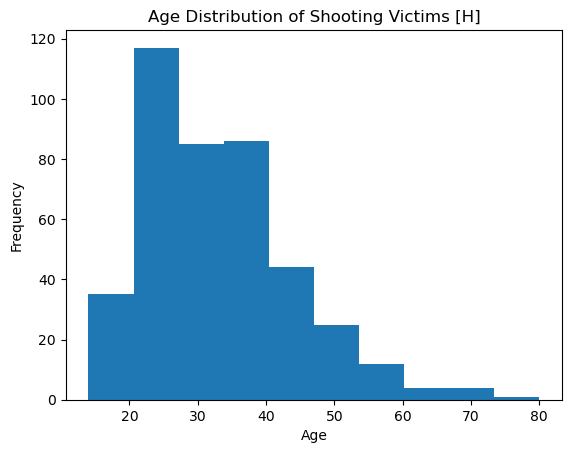

In [116]:
h_killings = killings[killings["race"] == 'H']
ages = h_killings["age"]
ages.plot(kind='hist')
plt.xlabel("Age")
plt.title("Age Distribution of Shooting Victims [H]")
h_killings

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
24,2285,Yia Lee,03/02/17,shot,gun,41.0,M,A,Panhandle,TX,False,attack,Not fleeing,False
60,2320,Pekelo Sanchez,11/02/17,shot,vehicle,33.0,M,A,Aiea,HI,False,other,Car,False
170,2477,Nengmy Vang,22/03/17,shot,gun,45.0,M,A,Weston,WI,False,attack,NaN,False
195,2476,Phosowath Sengphong,01/04/17,shot,knife,30.0,M,A,New Iberia,LA,False,other,NaN,False
207,2495,Jeffrey Lynn Curry,07/04/17,shot,gun,33.0,M,A,Kyle,SD,False,attack,Car,False
235,2521,Joseph Sin,22/04/17,shot,hatchet and gun,43.0,M,A,Yuba City,CA,False,attack,Foot,False
339,2627,Naway Willy,02/06/17,shot,gun,18.0,M,A,Tulsa,OK,False,attack,Foot,False
375,2666,Tommy Le,14/06/17,shot and Tasered,pen,20.0,M,A,Burien,WA,False,attack,Not fleeing,False
507,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
576,346,Matautu Nuu,28/01/15,shot and Tasered,hammer,35.0,M,A,Stockton,CA,True,attack,Not fleeing,False


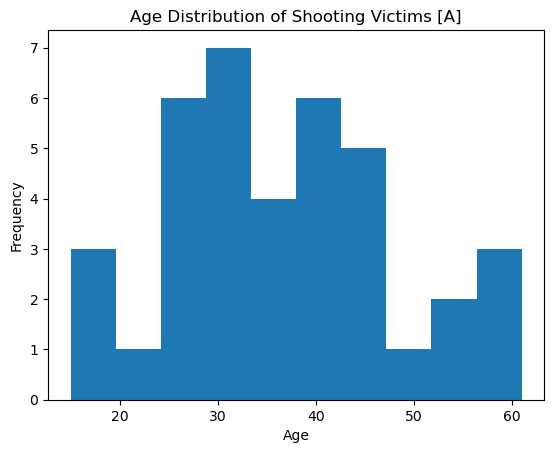

In [118]:
a_killings = killings[killings["race"] == 'A']
ages = a_killings["age"]
ages.plot(kind='hist')
plt.xlabel("Age")
plt.title("Age Distribution of Shooting Victims [A]")
a_killings

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
45,2314,Henry James Hunter,08/02/17,shot,knife,34.0,M,N,Anadarko,OK,False,other,NaN,False
125,2403,Dave Phoenix,03/03/17,shot,toy weapon,25.0,M,N,Lemoore,CA,False,attack,Not fleeing,False
218,2503,Ivan Wilson,14/04/17,shot,knife,24.0,M,N,Mandan,ND,False,other,Not fleeing,False
388,2680,Matthew Colton Stover,19/06/17,shot,gun,21.0,M,N,Fairbanks,AK,True,attack,Foot,False
571,348,Nicolas Leland Tewa,27/01/15,shot,vehicle,26.0,M,N,Phoenix,AZ,False,other,Not fleeing,False
718,531,Justin Fowler,20/03/15,shot,gun,24.0,M,N,Red Valley,AZ,False,attack,Car,False
803,393,Daniel Covarrubias,21/04/15,shot,unarmed,37.0,M,N,Lakewood,WA,True,other,Foot,False
945,563,Joe Charboneau,16/06/15,shot,gun,31.0,M,N,Wood Lake,ND,False,attack,Not fleeing,False
1015,628,Paul Castaway,12/07/15,shot,knife,35.0,M,N,Denver,CO,True,other,Foot,False
1032,656,Saige Hack,16/07/15,shot,gun,23.0,M,N,Cheyenne,WY,False,attack,Not fleeing,False


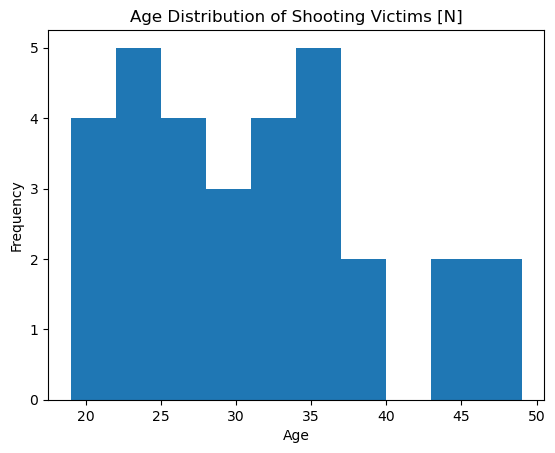

In [119]:
n_killings = killings[killings["race"] == 'N']
ages = n_killings["age"]
ages.plot(kind='hist')
plt.xlabel("Age")
plt.title("Age Distribution of Shooting Victims [N]")
n_killings

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
545,68,Zaki Shinwary,16/01/15,shot and Tasered,knife,48.0,M,O,Fremont,CA,False,other,Not fleeing,False
834,418,Fridoon Zalbeg Nehad,30/04/15,shot,unarmed,42.0,M,O,San Diego,CA,True,other,Not fleeing,True
839,428,Nadir Soofi,03/05/15,shot,gun,34.0,M,O,Garland,TX,False,attack,Not fleeing,False
859,449,Bruce Zalonka,12/05/15,shot and Tasered,gun,46.0,M,O,Honolulu,HI,False,attack,Not fleeing,False
894,491,Feras Morad,27/05/15,shot and Tasered,unarmed,20.0,M,O,Long Beach,CA,False,other,Not fleeing,False
1031,649,Mohammad Youssef Abdulazeez,16/07/15,shot,gun,24.0,M,O,Chattanooga,TN,True,attack,Not fleeing,False
1231,857,Robert Berger,23/09/15,shot,knife,48.0,M,O,Salt Lake City,UT,False,attack,Not fleeing,False
1238,865,Philip Quinn,24/09/15,shot,screwdriver,30.0,M,O,St. Paul,MN,True,other,Not fleeing,False
1261,895,Omar Ali,05/10/15,shot,unarmed,27.0,M,O,Akron,OH,False,other,Not fleeing,False
1319,956,Kobvey Igbuhay,26/10/15,shot,unarmed,18.0,M,O,Tampa,FL,False,attack,Foot,False


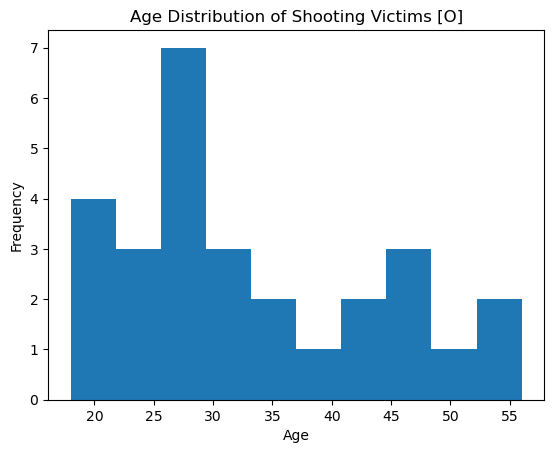

In [120]:
o_killings = killings[killings["race"] == 'O']
ages = o_killings["age"]
ages.plot(kind='hist')
plt.xlabel("Age")
plt.title("Age Distribution of Shooting Victims [O]")
o_killings